About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Download the [train.csv](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv) with House Prices

In [3]:
df = pd.read_csv('train.csv')
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
777,778,20,RL,100.0,13350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,142500
1420,1421,60,RL,90.0,11700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,179900
796,797,20,RL,71.0,8197,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2007,WD,Normal,143500


# Task 1 (2 points)

Test the hypothesis that the expected value ($\mu$) of size of garage in square feet (`'GarageArea'`) is 485. Use two-sided alternative hypothesis. Choose the test that is suitable for the data (and explain, why).

Do we reject/accept the hypothesis if $\alpha = 5\%$ ? And if $\alpha = 1\%$ ?

real mean value is 472.9801369863014
T-statistic: -2.1481193678999415, P-value: 0.03186850064864378


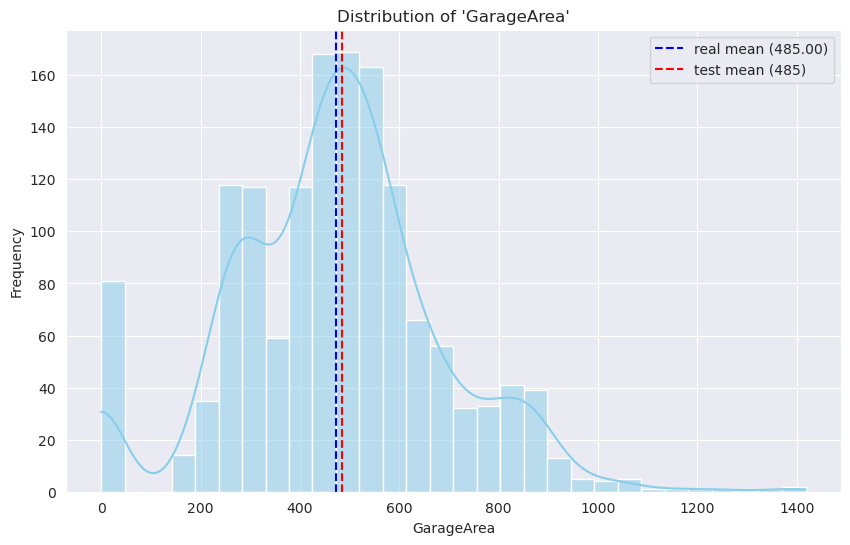

In [12]:
import scipy.stats as stats

print(f"real mean value is {df['GarageArea'].mean()}")

test_mean = 485

t_statistic, p_value = stats.ttest_1samp(df['GarageArea'], 485)


print(f"T-statistic: {t_statistic}, P-value: {p_value}")


plt.figure(figsize=(10, 6))
sns.histplot(df['GarageArea'], kde=True, bins=30, color='skyblue')
plt.axvline(df['GarageArea'].mean(), color='blue', linestyle='--', label=f'real mean ({test_mean:.2f})')
plt.axvline(485, color='red', linestyle='--', label='test mean (485)')
plt.title("Distribution of 'GarageArea'")
plt.xlabel('GarageArea')
plt.ylabel('Frequency')
plt.legend()
plt.show()

I used Student test as most suitable metric for testing differences in distributions like these. It's just designed for this

If we use $\alpha$ = 0.05 we can reject the null hypothesis. Thus `test_mean` is in acceptable boundaries. 0.032 < 0.05
In case of $\alpha$ = 0.01 we maintain the hypothesis. `test_mean` outside acceptable  0.032 > 0.01


# Task 2 (2 points)

Is the condition of the material on the exterior (`'ExterCond'`) independent of the exterior material quality (`'ExterQual'`)?

Find it out using hypothesis testing ($\alpha = 5\%$)

In [15]:
contingency_table = pd.crosstab(df['ExterCond'], df['ExterQual'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print('P VALUE IS VERY SMALL')

Chi-Square Statistic: 156.2895311162874
P-value: 2.9908872405484838e-27
P VALUE IS VERY SMALL


we reject the null hypothesis: ExterCond and ExterQual are not independent. The p values is drastically smaller than 0.05

# Task 3 (2 points)

The *United Housing Journal™* conducted theoretical research and calculated the probabilities that house is located in a particular zone (`'MSZoning'`):

* $0.01$ - Agriculture
* $0.01$ - Commercial
* $0.05$ - Floating Village Residential
* $0.01$ - Industrial
* $0.01$ - Residential High Density
* $0.8$ - Residential Low Density
* $0.01$ - Residential Low Density Park
* $0.1$ - Residential Medium Density

Does the data from our dataset follow this distribution?

Find it out using hypothesis testing ($\alpha = 5\%$)

In [19]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

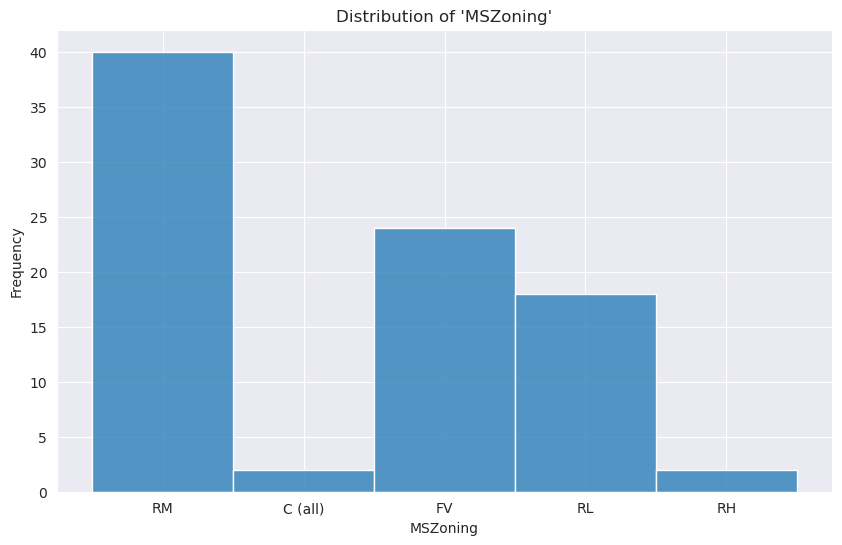

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MSZoning'])
plt.title("Distribution of 'MSZoning'")
plt.xlabel('MSZoning')
plt.ylabel('Frequency')
plt.show()

In [68]:
expected_probabilities = {
    'C': 0.01,  # Commercial
    'FV': 0.05,  # Floating Village Residential
    'RH': 0.01,  # Residential High Density
    'RL': 0.8,   # Residential Low Density
    'RM': 0.1    # Residential Medium Density
}


observed_counts = df['MSZoning'].value_counts().reindex(expected_probabilities.keys(), fill_value=0)

# I had to rescale and omit some expected probabilities because of index

sum_expected = np.array(list(expected_probabilities.values())).sum()
sum_observed = observed_counts.sum()
observed_counts = observed_counts * sum_expected / sum_observed

expected_counts = [prob for prob in expected_probabilities.values()]

chi2_stat, p_value = stats.chisquare(f_obs=observed_counts.values, f_exp=expected_counts)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("verdict: REJECT Ho")
else:
    print("verdict: MAINTAIN Ho")


Chi-Square Statistic: 0.033033523008323414
P-value: 0.9998650909757844
verdict: MAINTAIN Ho


that was tricky but simple chi square test will help us compare distributions. I had to rescale observed values because of assertion error in `stats.chisquare` for sum of expected_counts. 

So yes, it matches the expected distribution! And quite good

# Task 4 (2 points)

Let's compare houses that has access to differnet types of alleys (`'Alley'`). Do they have the same linear feet of street connected to property (`'LotFrontage'`)?

Find it out using hypothesis testing ($\alpha = 5\%$)

In [72]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = df.dropna(subset=['LotFrontage', 'Alley'])
groups = [group['LotFrontage'].values for name, group in df.groupby('Alley')]

f_stat, p_value = stats.f_oneway(*groups)

print("F test", f_stat)
print("p value:", p_value)

if p_value < 0.05:
    print("REJECT Ho")

    # post-hoc test if anova IS significant
    tukey_results = pairwise_tukeyhsd(endog=df['LotFrontage'], groups=df['Alley'], alpha=0.05)
    print(tukey_results)


F test 14.11276801696159
p value: 0.0003167170921464645
REJECT Ho
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  Grvl   Pave  -15.078 0.0003 -23.0596 -7.0965   True
-----------------------------------------------------


That's a good place for f test. In that case it's one way anova. We have a categorical feature and continious variable. As we can see, there is a significant difference in `LotFrontage` between different types of alleys. I also added Tukey's HSD to determine which specific groups differ from each other. But we have only one. So, yes, after all linear feet of streets do differ. 


# Task 5 (2 points)

Find features with the maximal positive/negative correlation. Does it seem logical? Why/why not?

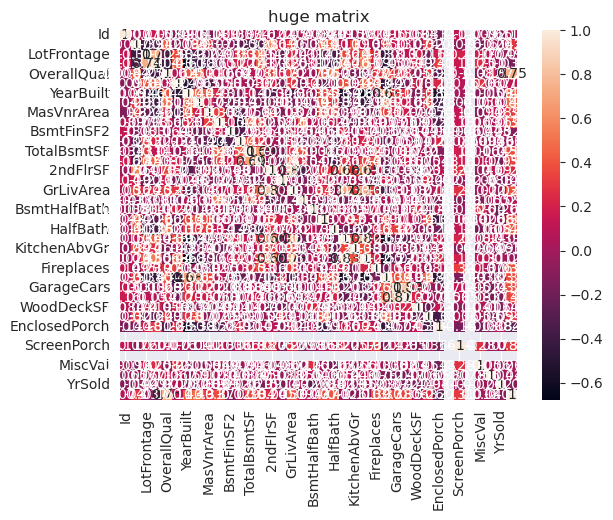

In [80]:
correlation_matrix = df.corr(numeric_only=True, method='spearman')
sns.heatmap(correlation_matrix, annot=True)
plt.title("huge matrix")
plt.show()

In [81]:
# to ignore self-correlations
np.fill_diagonal(correlation_matrix.values, np.nan)

# maximum positive and minimum negative corr
max_positive_corr = correlation_matrix.max().max()
max_negative_corr = correlation_matrix.min().min()

positive_pair = correlation_matrix.stack().idxmax()
negative_pair = correlation_matrix.stack().idxmin()

print("max positive:", max_positive_corr, "between", positive_pair)
print("max negative:", max_negative_corr, "between", negative_pair)

max positive: 0.8675751328855964 between ('GarageCars', 'GarageArea')
max negative: -0.6784089861906493 between ('YearBuilt', 'TotRmsAbvGrd')


Of course i used Spearman for that. 

So the minimal is between `Original construction date` and `Total rooms above grade` -- no sense and that's happened because we correlated blindly. But maybe `TotRmsAbvGrd` has decreased with time. I can only guess why. 

The max positive is between `Size of garage in car capacity` and `Size of garage in square feet`. Which makes sense

